<span style="color: #F08000; font-size: 24px;">About Dataset.</span>

* India crop production stats by state, district (1997-2015).
* Covers four seasons: Kharif, Rabi, Summer, Autumn.
* Useful for researchers, policymakers, farmers.

* Indian agriculture faces challenges: climate change, low productivity, food security.
* Data-driven solutions are needed to inform policy and decision-making.
* Crop production data can help improve policy, practices, and predictions.

<span style="color: #F08000; font-size: 24px;">Problem Statements.</span><br>

<span style="color: #333399; font-size: 20px;">1.How has crop production changed over the past 18 years (1997-2015) in different regions of India? Are there any upward or downward trends?</span><br>
<span style="color: #333399; font-size: 20px;">2.Which crops have the highest yields in different regions? Can farmers be encouraged to grow more high-yield crops?</span><br>
<span style="color: #333399; font-size: 20px;">3.Which states have the highest crop production in different crop category? </span><br>




In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")


In [3]:
crop_Production=pd.read_csv('Crop Production data.csv')
crop_Production.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


<span style="color: #F08000; font-size: 20px;">Checking for missing data</span>


In [4]:
round(crop_Production.isnull().sum()/len(crop_Production),2)

State_Name       0.00
District_Name    0.00
Crop_Year        0.00
Season           0.00
Crop             0.00
Area             0.00
Production       0.02
dtype: float64

In [5]:
#here production have null values around 0.02% of total,its very small part of data so we will remove those null values
crop_Production.dropna(inplace=True)

<span style="color: #F08000; font-size: 20px;">checking for the duplicate values in our dataset
</span>


In [6]:
crop_Production.duplicated().sum()
#There are no duplicate values

0

In [7]:
crop_Production['State_Name']=crop_Production['State_Name'].str.strip()

In [8]:
def State_category(State_Name):
    for i in ['Chandigarh','Haryana','Himachal Pradesh','Jammu and Kashmir','Punjab','Uttarakhand','Uttar Pradesh']:
        if State_Name == i:
            return 'North India'
    for i in ['Andaman and Nicobar Islands','Arunachal Pradesh','Assam', 'Bihar','Chhattisgarh','Jharkhand','Manipur','Meghalaya',
             'Mizoram','Nagaland','Odisha','Sikkim','Tripura','West Bengal']:
        if State_Name == i:
            return 'East India'
    for i in ['Andhra Pradesh','Karnataka','Kerala','Puducherry','Tamil Nadu','Telangana']:
        if State_Name == i:
            return 'South India'
    for i in ['Dadra and Nagar Haveli','Goa','Gujarat','Maharashtra','Madhya Pradesh','Rajasthan']:
        if State_Name == i:
            return 'West India'

In [9]:
crop_Production['Zone']=crop_Production['State_Name'].apply(State_category)

In [41]:
crop_Production

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zone,Yield,id,crop_category
0,Andaman & Nicobar Island,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,East India,1.594896,35,Commercial
1,Andaman & Nicobar Island,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,East India,0.500000,35,Pulses
2,Andaman & Nicobar Island,NICOBARS,2000,Kharif,Rice,102.0,321.0,East India,3.147059,35,Cereal
3,Andaman & Nicobar Island,NICOBARS,2000,Whole Year,Banana,176.0,641.0,East India,3.642045,35,Fruits
4,Andaman & Nicobar Island,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,East India,0.229167,35,Nuts
...,...,...,...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0,East India,2.617647,19,Cereal
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0,East India,0.738437,19,Oilseeds
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,East India,50.154321,19,Commercial
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0,East India,2.141848,19,Cereal


In [38]:
def crop_category(crop):
    for i in ['Rice','Wheat','Barley','Other Cereals','Bajra','Jowar','Ragi','Small millets','Maize','Korra','Samai','Varagu','Paddy',
             'Other Cereals & Millets','Total foodgrain','Jobster']:
        if crop == i:
            return 'Cereal'
    for i in ['Urad','Moong(Green Gram)','Arhar/Tur','Masoor','Other Kharif pulses','Peas & beans (Pulses)','Other Summer Pulses','other misc. pulses',
              'Other  Rabi pulses','Gram','Khesari','Blackgram','Lentil','Pulses total','Bean']:
        if crop ==i:
            return 'Pulses'
    for i in ['Coconut ','Banana','Citrus Fruit','Grapes', 'Mango','Orange','Other Fresh Fruits','Papaya', 'Pome Fruit','Pome Granet', 'Sapota',
              'Pineapple','Other Citrus Fruit', 'Water Melon','Apple', 'Peach', 'Pear', 'Plums', 'Litchi', 'Ber','Pump Kin','Jack Fruit','Pump Kin']:
        if crop ==i:
            return 'Fruits'
    for i in ['Groundnut','Guar seed','Horse-gram','Moth','Cowpea(Lobia)','Rajmash Kholar','Ricebean (nagadal)','Lab-Lab']:
        if crop ==i:
            return 'Beans'
    for i in ['Sweet potato','Onion','Potato','Tapioca','Garlic','Beans & Mutter(Vegetable)','Bhindi', 'Brinjal','Cucumber','Other Vegetables',
              'Tomato','Lemon','Cabbage','Peas  (vegetable)','Bottle Gourd','Turnip', 'Carrot','Redish','Bitter Gourd', 'Drum Stick','Snak Guard',
             'Cauliflower','Colocosia','Perilla','Yam','Garlic','Ginger','Ash Gourd', 'Beet Root','Ribed Guard']:
        if crop ==i:
            return 'Vegetables'
    for i in ['Black pepper','Turmeric','Cardamom','Dry chillies','Coriander','Dry ginger']:
        if crop ==i:
            return 'Spices'
    for i in ['Jute','Cotton(lint)','Mesta','Sannhamp','other fibres','Jute & mesta','Kapas','Cond-spcs other']:
        if crop ==i:
            return 'Fibres'
    for i in ['Cashewnut','Other Dry Fruit','Cashewnut Processed','Arcanut (Processed)', 'Atcanut (Raw)','Cashewnut Raw']:
        if crop ==i:
            return 'Nuts'
    for i in ['other oilseeds','Rapeseed &Mustard','Sunflower','Castor seed','Niger seed','Soyabean','Sesamum','Linseed','Safflower','Oilseeds total']:
        if crop ==i:
            return 'Oilseeds'
    for i in ['Sugarcane','Tobacco','Arecanut','Coffee','Tea','Rubber']:
        if crop ==i:
            return 'Commercial'

In [39]:
crop_Production['crop_category']=crop_Production['Crop'].apply(crop_category)

In [13]:
crop_Production['Yield']=crop_Production['Production']/crop_Production['Area']

<span style="color: #333399; font-size: 20px;">1.How has crop production changed over the past 23 years (1997-2020) in different regions of India? Are there any upward or downward trends?</span><br>


In [14]:
regionwise_production=crop_Production.groupby(['Zone','Crop_Year'],as_index=False)['Production'].sum()
regionwise_production

,Zone,Crop_Year,Production
0,East India,1997,1.171061e+08
1,East India,1998,2.169424e+08
2,East India,1999,2.176716e+08
3,East India,2000,2.964899e+08
4,East India,2001,3.338435e+08
...,...,...,...
68,West India,2010,2.204284e+08
69,West India,2011,1.951657e+08
70,West India,2012,1.648158e+08
71,West India,2013,1.519680e+08


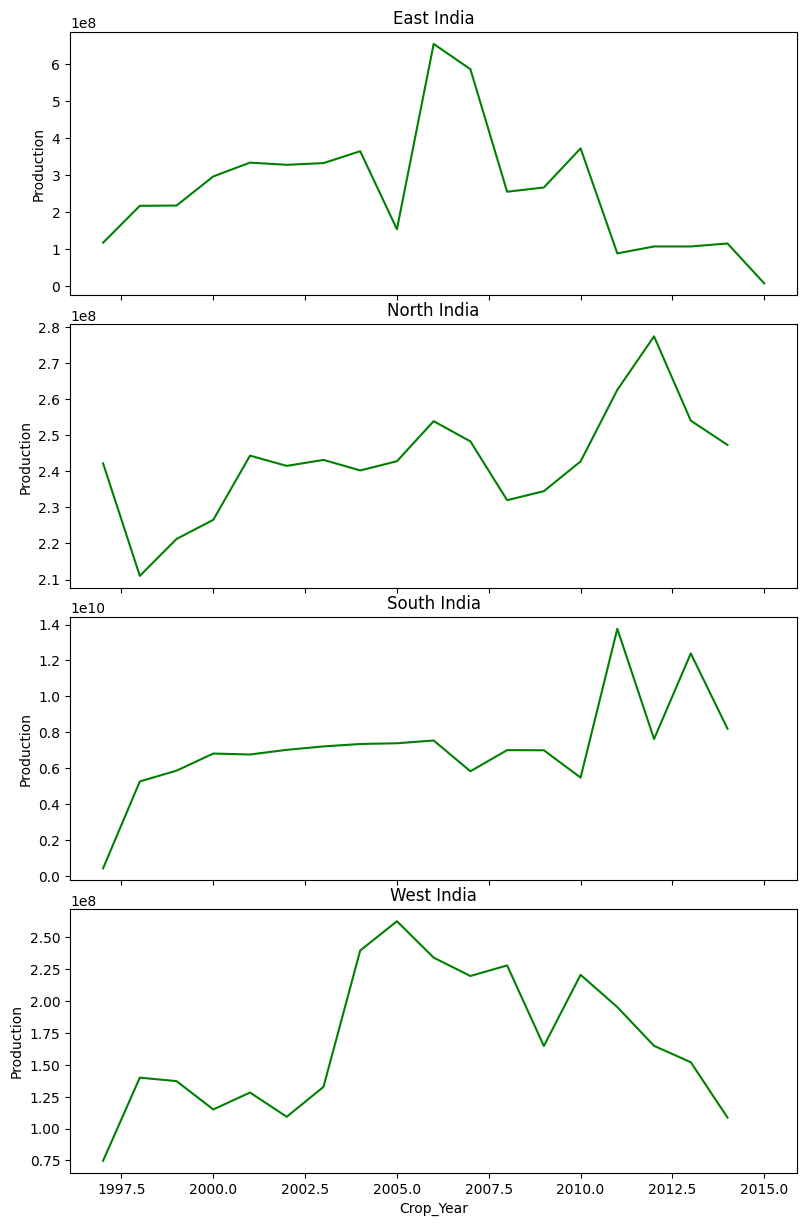

In [68]:
fig, ax = plt.subplots(nrows=regionwise_production["Zone"].nunique(),sharex=True, figsize=(8, 12))
fig.tight_layout()

for idx, Zone in enumerate(regionwise_production["Zone"].unique()):
    crop_df = regionwise_production.loc[regionwise_production["Zone"] == Zone]
    sns.lineplot(data=crop_df, x="Crop_Year", y="Production", ax=ax[idx],color='green')
    ax[idx].title.set_text(Zone)

<span style="color: #333399; font-size: 20px;">2.Which crops have the highest yields in different regions? Can farmers be encouraged to grow more high-yield crops?</span><br>


In [51]:
a=crop_Production.groupby(['State_Name','Crop'],as_index=False)['Yield'].mean().sort_values(by=['Yield'],ascending=False)
a

,State_Name,Crop,Yield
831,Puducherry,Coconut,11563.106646
32,Andhra Pradesh,Coconut,10689.470339
1042,Telangana,Coconut,10366.802670
505,Kerala,Coconut,5944.032734
110,Assam,Coconut,5295.174751
...,...,...,...
499,Kerala,Bitter Gourd,0.000000
1036,Telangana,Bottle Gourd,0.000000
501,Kerala,Brinjal,0.000000
993,Tamil Nadu,Other Citrus Fruit,0.000000


In [ ]:
a=crop_Production.groupby(['State_Name','Crop'],as_index=False)['Yield'].mean().sort_values(by=['Yield'],ascending=False)
a

C:\Users\Hp\AppData\Local\Temp\ipykernel_14192\1550698968.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\Hp\Desktop\akash\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


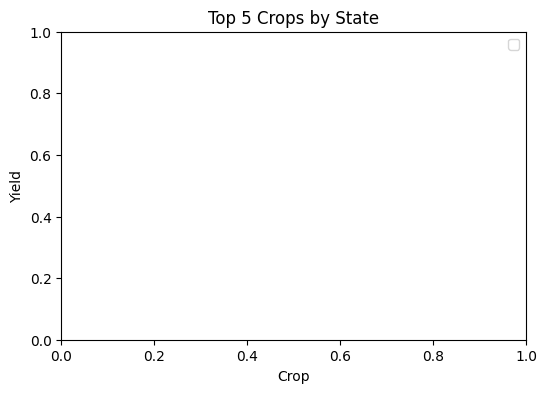

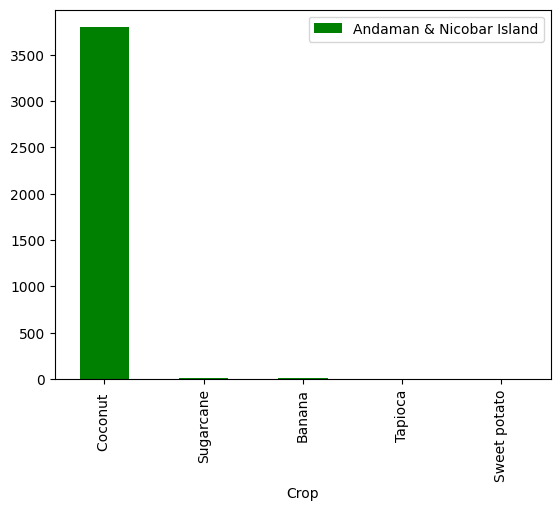

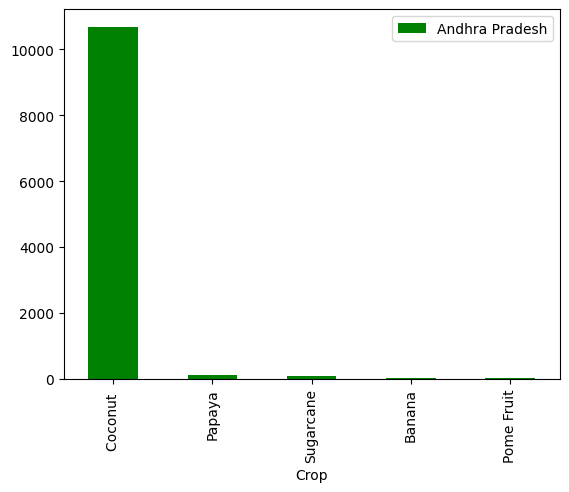

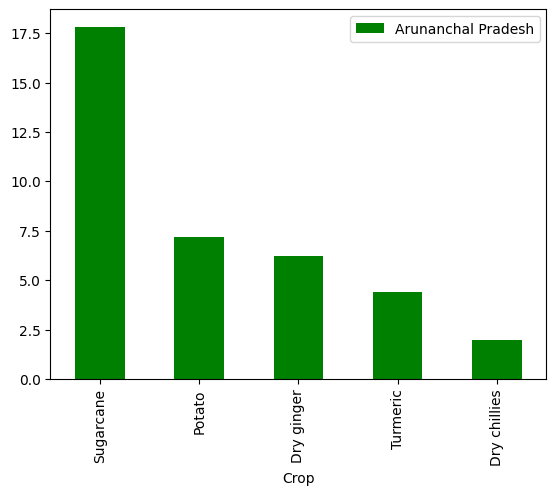

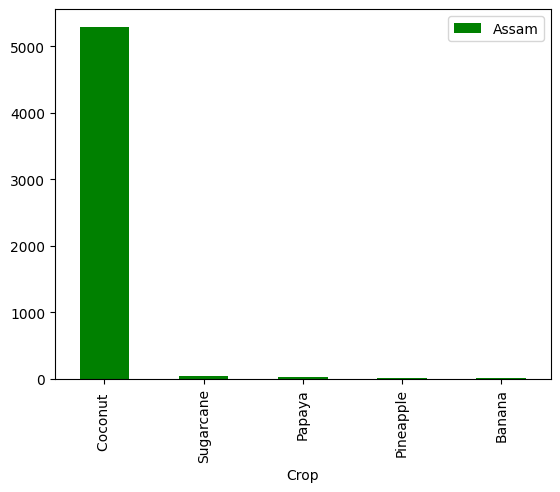

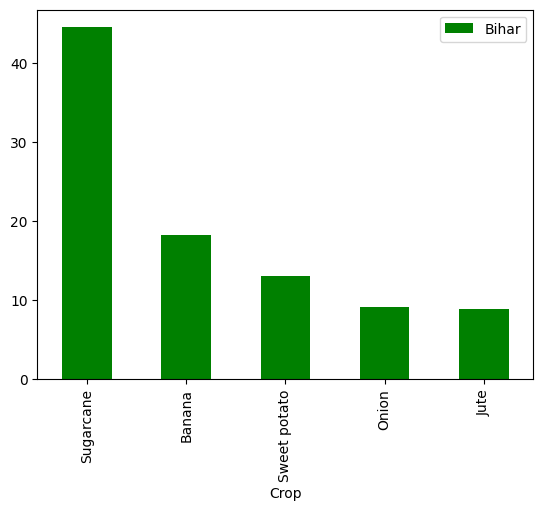

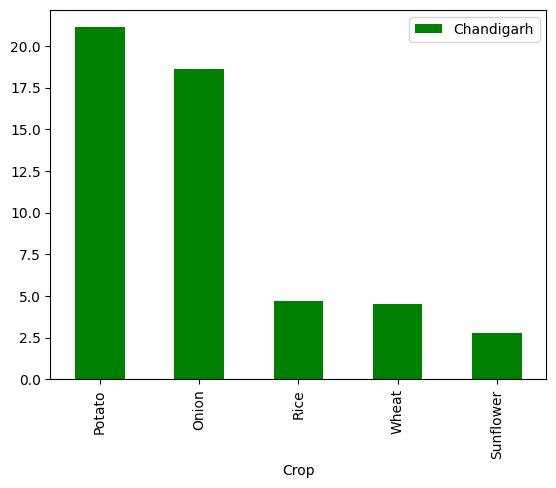

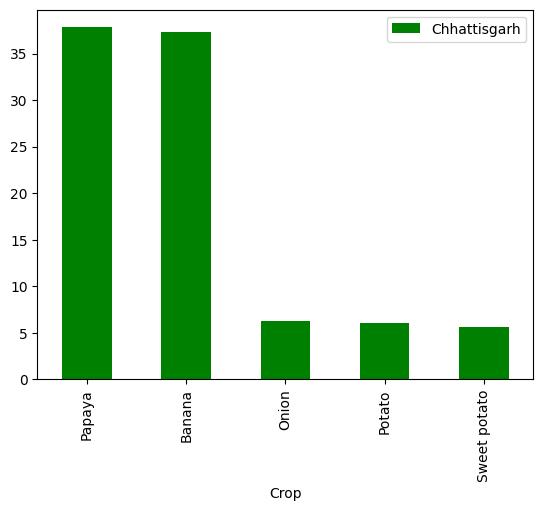

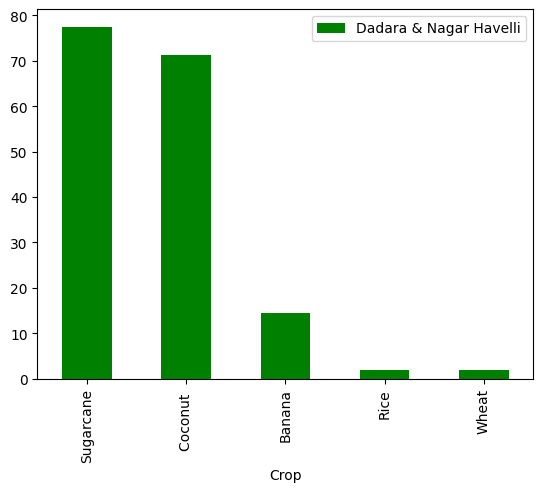

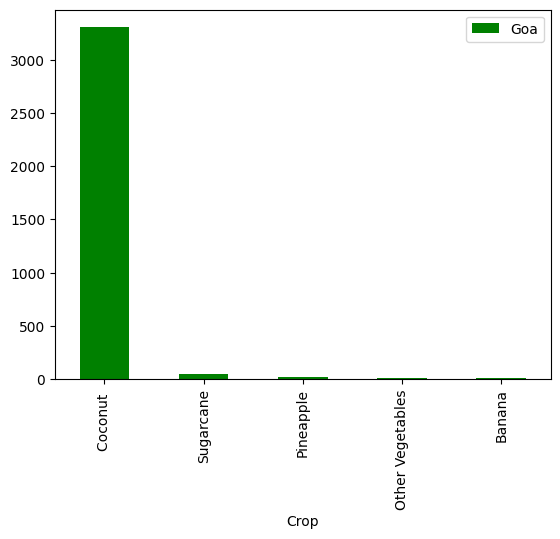

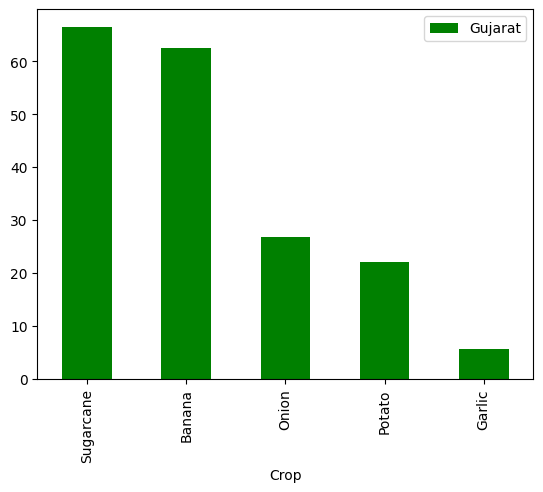

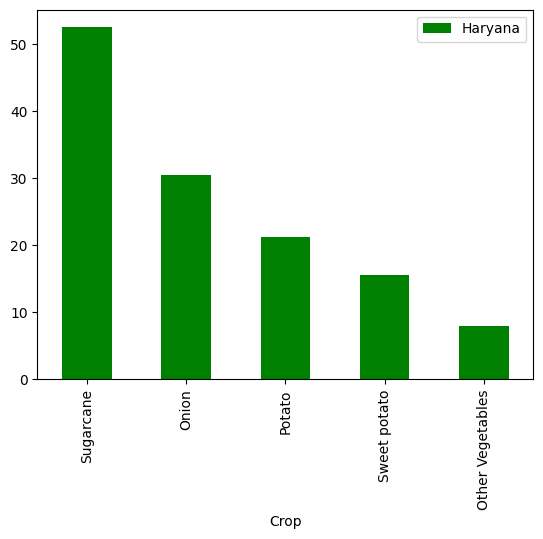

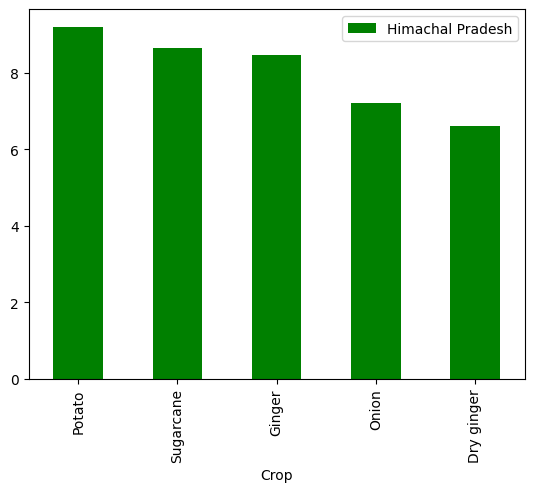

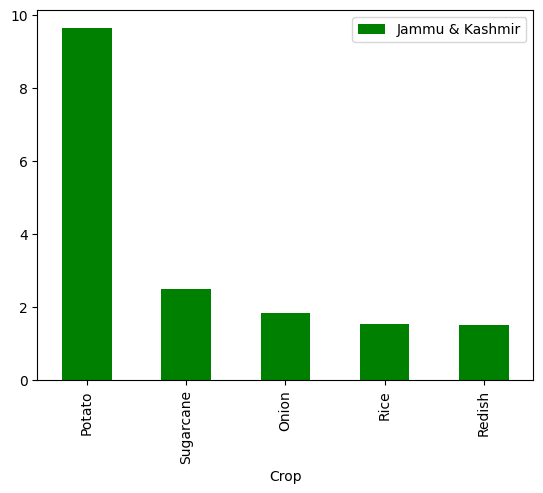

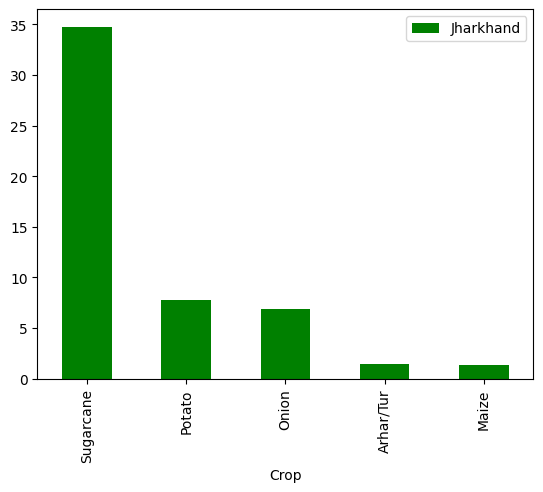

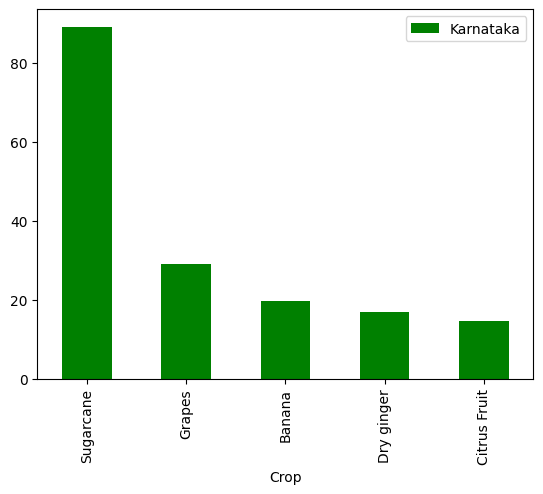

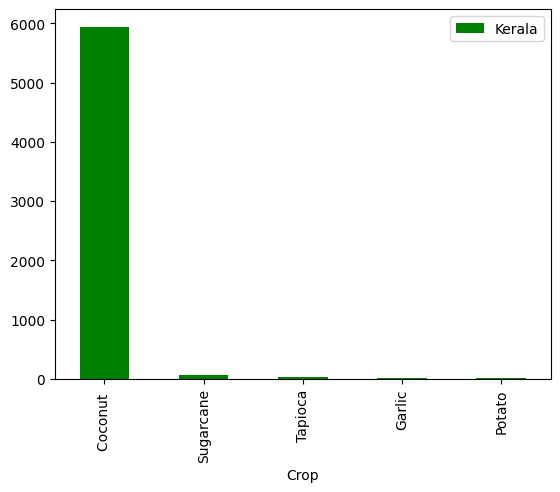

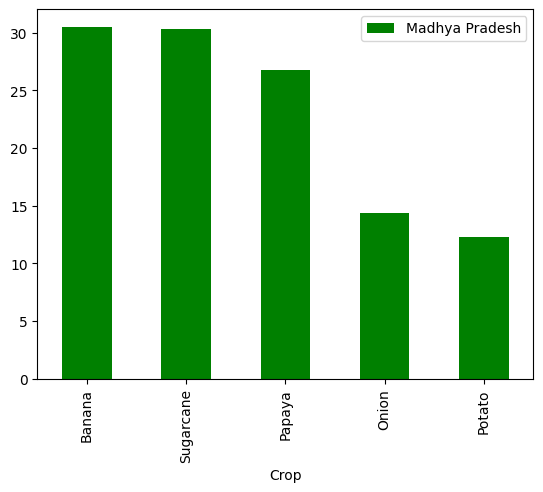

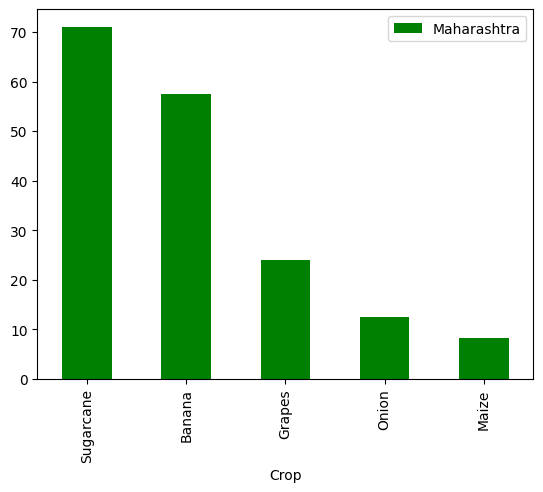

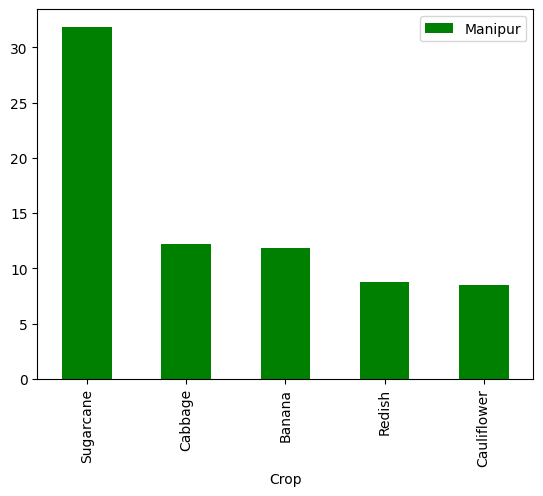

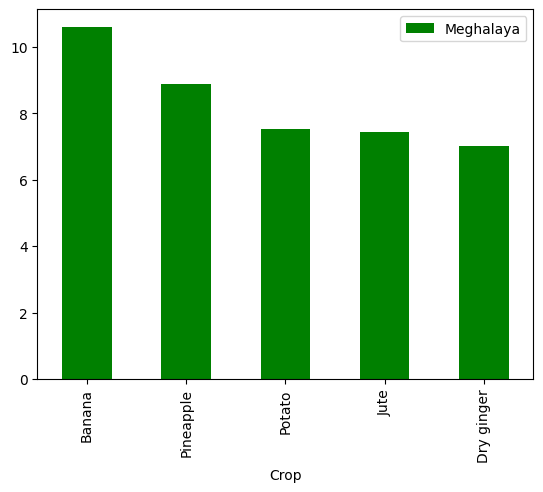

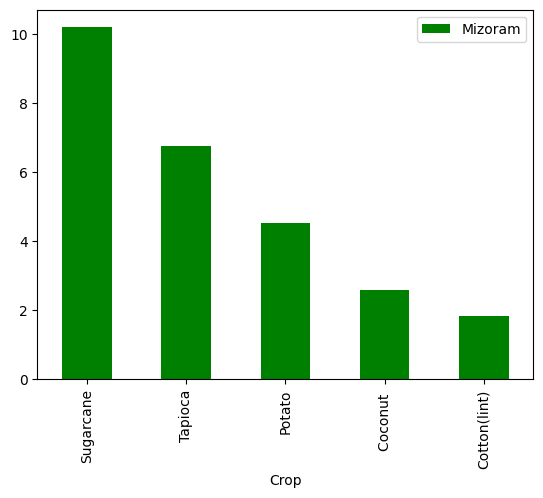

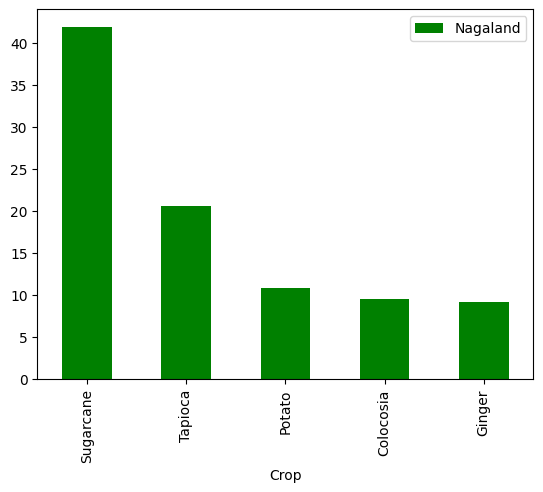

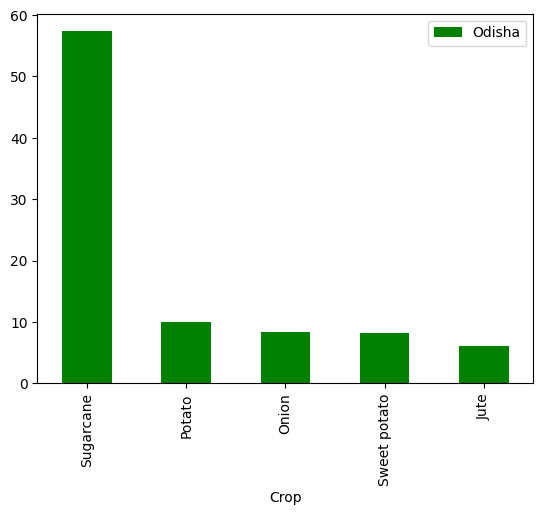

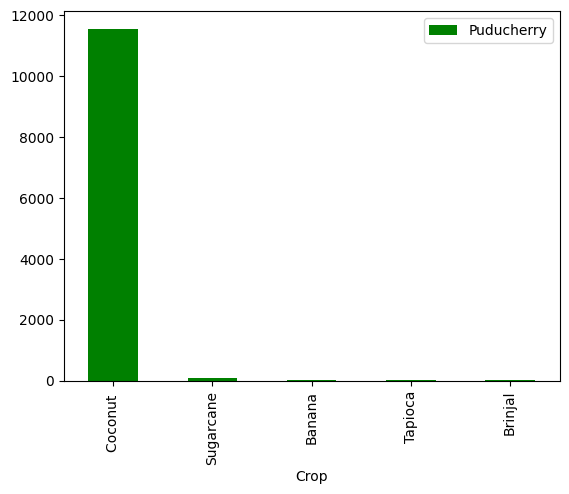

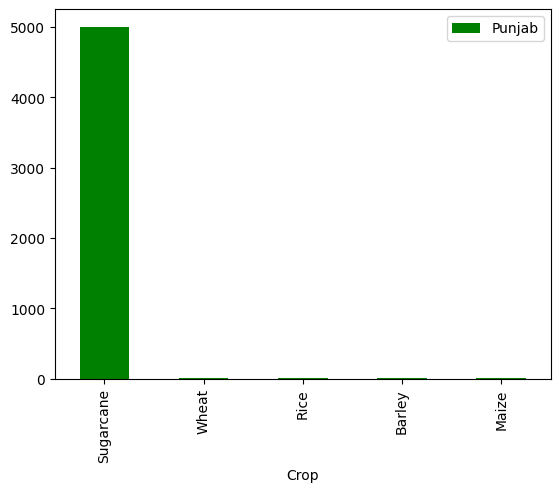

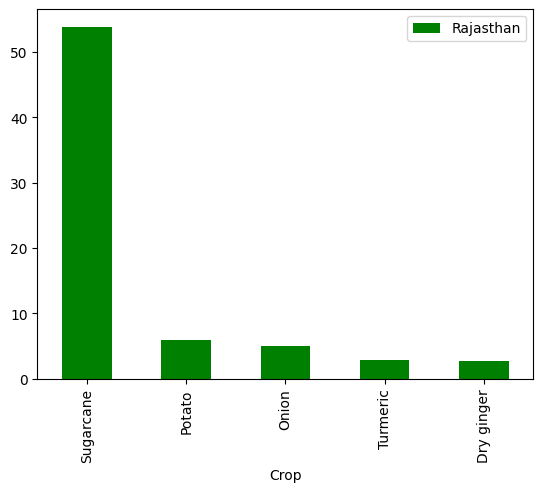

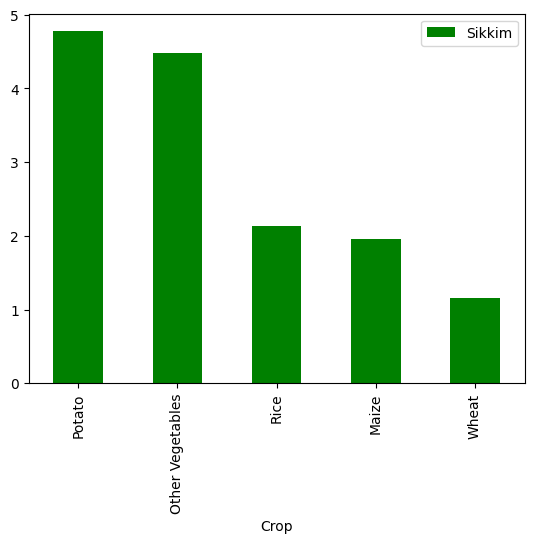

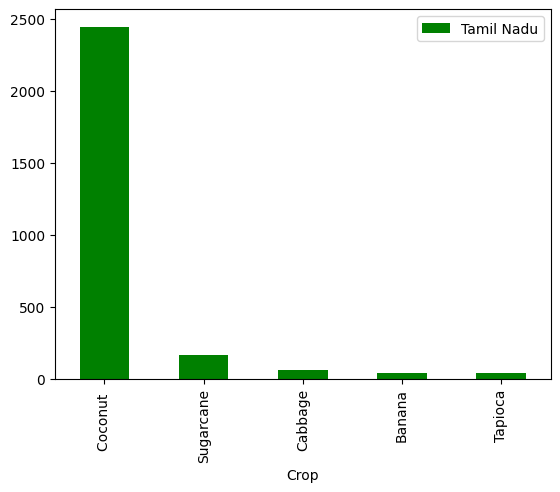

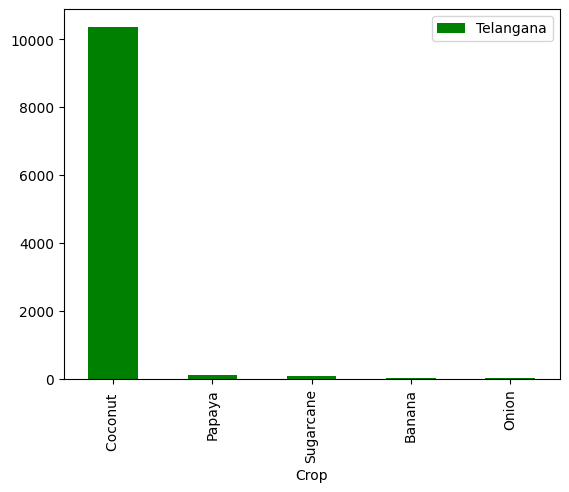

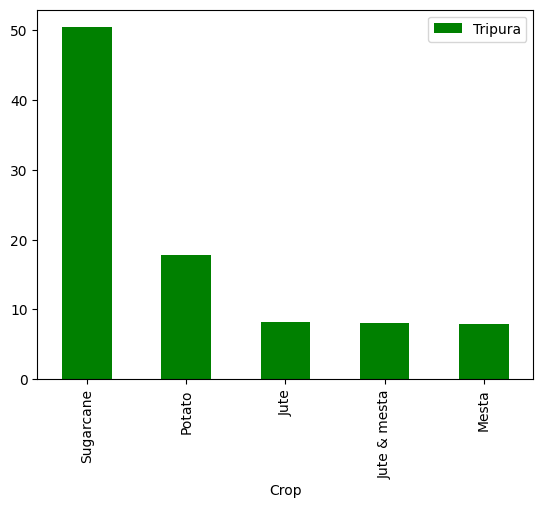

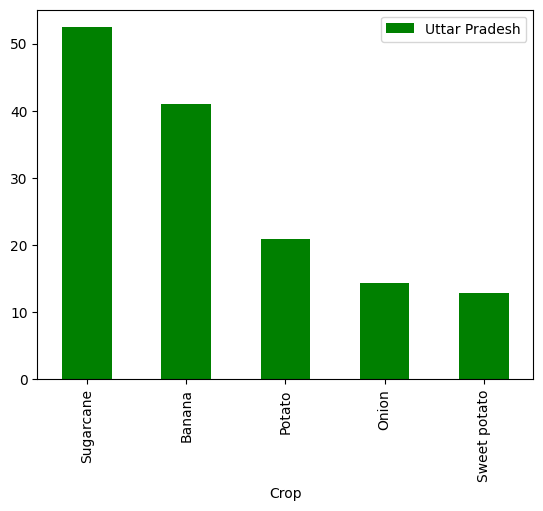

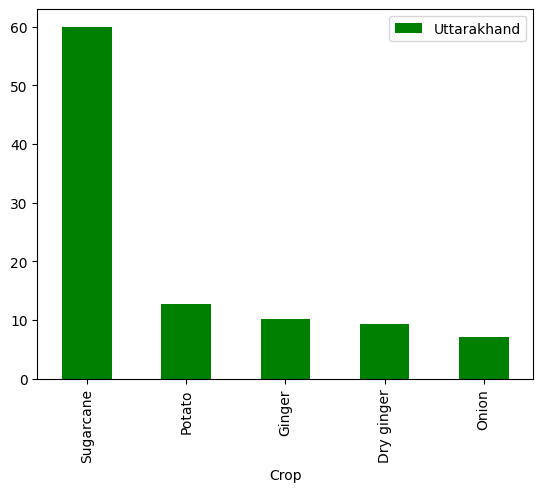

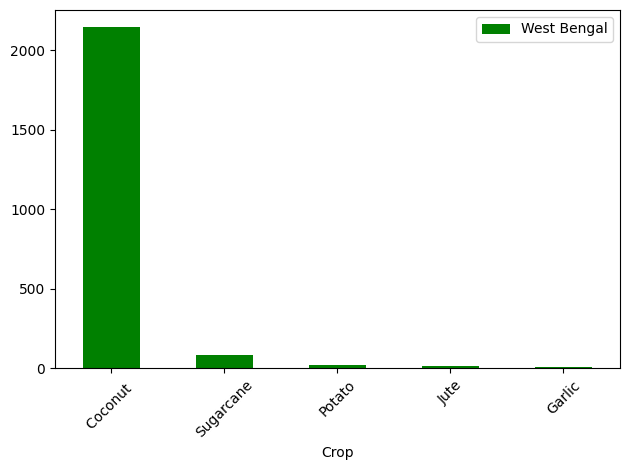

In [54]:
# Group data by state and get top 5 crops
top_crops = a.groupby("State_Name",as_index=False).apply(lambda x: x.nlargest(5, "Yield"))

fig, ax = plt.subplots(figsize=(6, 4))

for state, group in top_crops.groupby("State_Name"):
    group.plot(x="Crop", y="Yield", label=state,kind='bar',color='green')

ax.set_xlabel("Crop")
ax.set_ylabel("Yield")
ax.set_title("Top 5 Crops by State")
ax.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit


plt.show()


In [ ]:
grouped_data

In [ ]:
grouped_data = crop_Production.groupby([ "Season"])["Production"].sum()

# Choose a visualization method (here, stacked bar chart)
grouped_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("Season")
plt.ylabel("Total Production")
plt.title("Crop Production by Season in Different Regions")
plt.legend(title="Crop")
plt.xticks(rotation=45)
plt.show()

In [15]:
import json
india_states=json.load(open('states_india.geojson','r'))
state_id_map = {}
for feature in india_states["features"]:
    feature["id"] = feature["properties"]["state_code"]
    state_id_map[feature["properties"]["st_nm"]] = feature["id"]

In [ ]:
state_id_map

In [16]:
crop_Production['State_Name'] = crop_Production['State_Name'].replace('Andaman and Nicobar Islands', 'Andaman & Nicobar Island')
crop_Production['State_Name'] = crop_Production['State_Name'].replace('Jammu and Kashmir', 'Jammu & Kashmir')
crop_Production['State_Name'] = crop_Production['State_Name'].replace('Dadra and Nagar Haveli', 'Dadara & Nagar Havelli')
crop_Production['State_Name'] = crop_Production['State_Name'].replace('Arunachal Pradesh', 'Arunanchal Pradesh')

In [17]:
crop_Production["id"] = crop_Production["State_Name"].apply(lambda x: state_id_map[x])

In [22]:
crop_Production['Season']=crop_Production['Season'].str.strip()

In [23]:
Kharif=crop_Production[crop_Production['Season'] == 'Kharif']

In [40]:
Kharif

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zone,Yield,id
0,Andaman & Nicobar Island,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,East India,1.594896,35
1,Andaman & Nicobar Island,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,East India,0.500000,35
2,Andaman & Nicobar Island,NICOBARS,2000,Kharif,Rice,102.0,321.0,East India,3.147059,35
10,Andaman & Nicobar Island,NICOBARS,2001,Kharif,Arecanut,1254.0,2061.0,East India,1.643541,35
11,Andaman & Nicobar Island,NICOBARS,2001,Kharif,Other Kharif pulses,2.0,1.0,East India,0.500000,35
...,...,...,...,...,...,...,...,...,...,...
246066,West Bengal,PURULIA,2014,Kharif,Other Kharif pulses,79.0,39.0,East India,0.493671,19
246067,West Bengal,PURULIA,2014,Kharif,Sannhamp,171.0,727.0,East India,4.251462,19
246068,West Bengal,PURULIA,2014,Kharif,Soyabean,18.0,7.0,East India,0.388889,19
246069,West Bengal,PURULIA,2014,Kharif,Sunflower,46.0,42.0,East India,0.913043,19


<span style="color: #333399; font-size: 20px;">3.Which states have the highest crop production in different crop category?/span><br>


In [77]:
d=crop_Production.groupby(['crop_category','State_Name'],as_index=False)['Production'].sum().sort_values(by=['Production'],ascending=False)
d

,crop_category,State_Name,Production
130,Fruits,Kerala,9.781287e+10
120,Fruits,Andhra Pradesh,1.683410e+10
139,Fruits,Tamil Nadu,1.099818e+10
89,Commercial,Uttar Pradesh,2.205006e+09
121,Fruits,Assam,1.969293e+09
...,...,...,...
135,Fruits,Mizoram,4.000000e+01
0,Beans,Andaman & Nicobar Island,1.440000e+01
225,Spices,Dadara & Nagar Havelli,4.000000e+00
128,Fruits,Jammu & Kashmir,0.000000e+00


In [64]:
top_crop_category.to_csv('top_crop_category.csv',index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

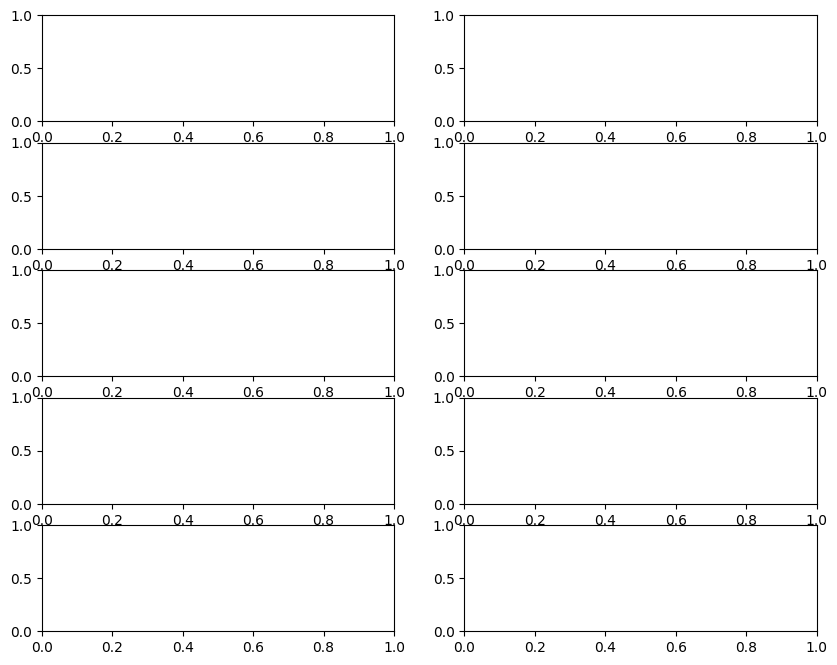

In [86]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 8))  # Adjust figure size as needed

# Iterate through each crop category and group
for i, (crop_category, group) in enumerate(top_crop_category.groupby("crop_category")):
    group.plot(kind='bar', x="State_Name", y="Production", color='green', ax=axes[i])
    axes[i].set_title(f"Top 5 States by {crop_category}")
    axes[i].set_xlabel("State_Name")
    axes[i].set_ylabel("Production")

# Additional customizations (optional)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit

# Add a legend outside the subplots
handles, labels = axes[0].get_legend_handles_labels()  # Get handles and labels from the first subplot
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)  # Create a legend outside all subplots

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


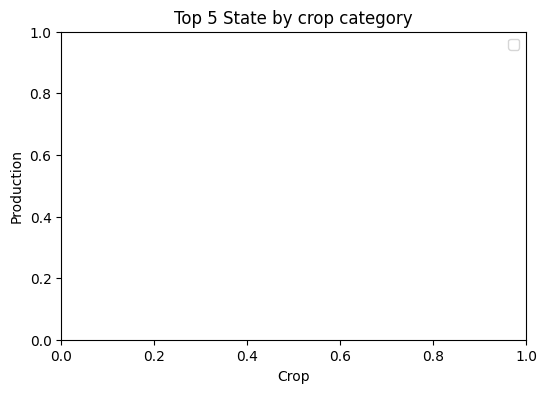

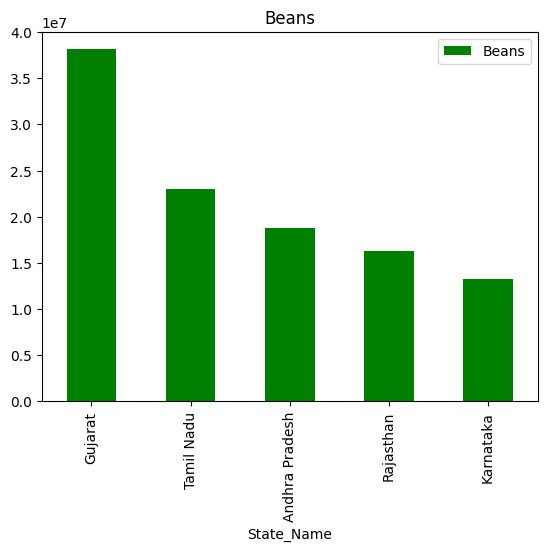

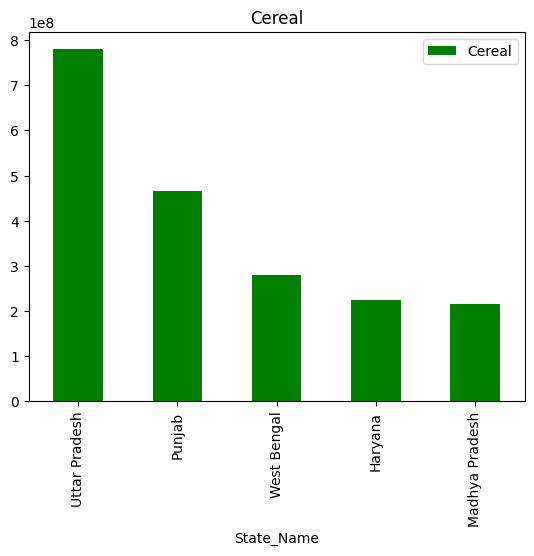

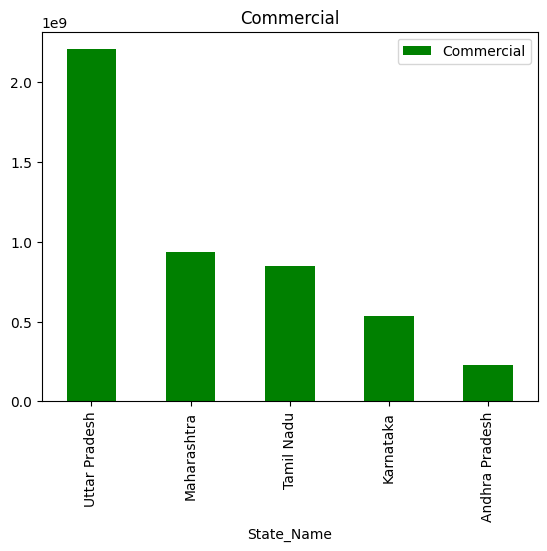

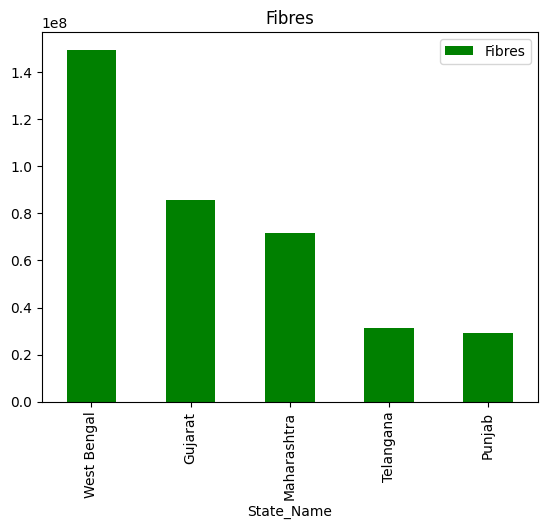

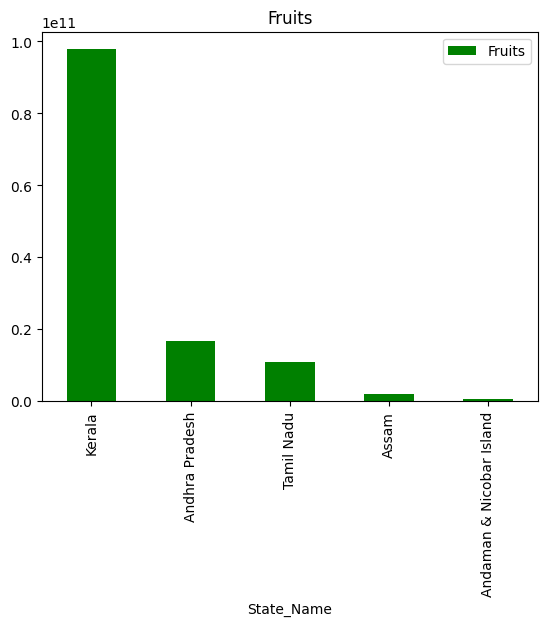

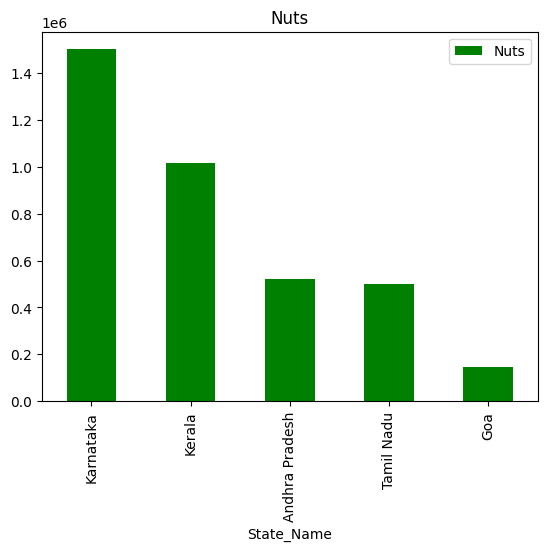

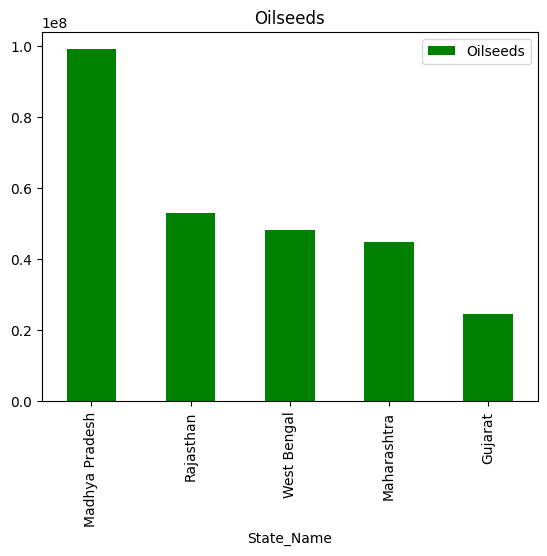

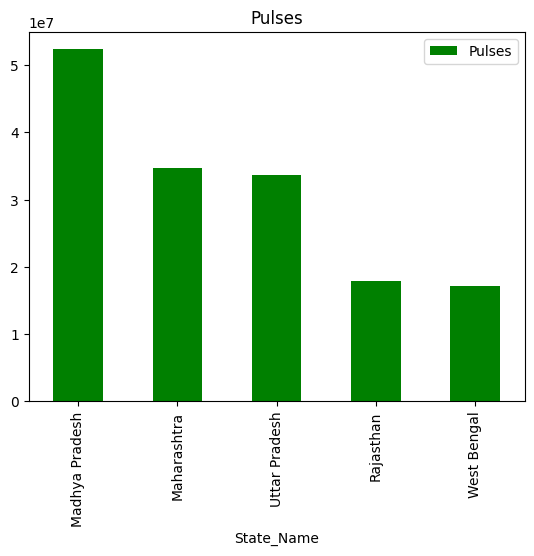

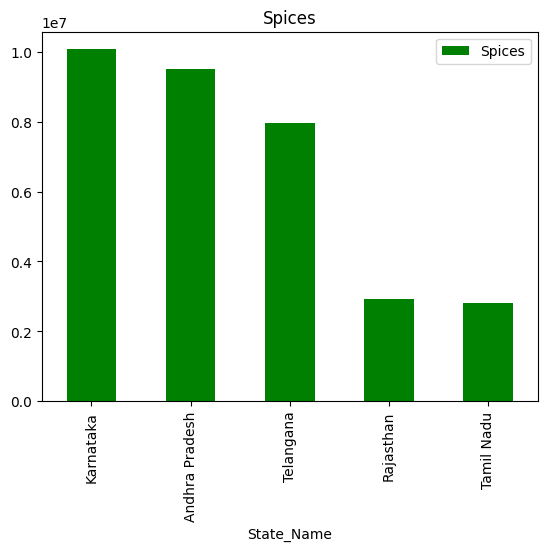

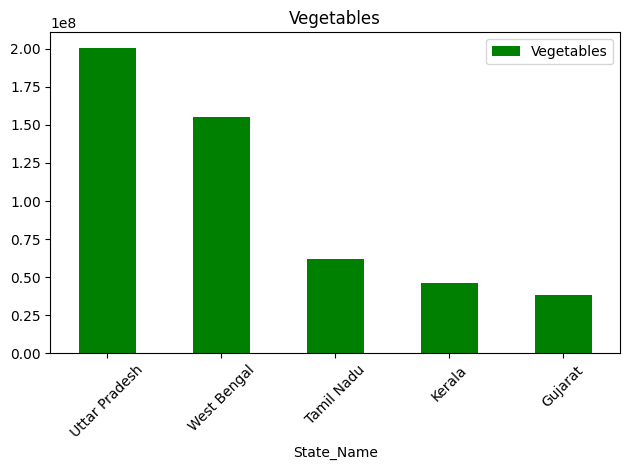

In [80]:
# Group data by state and get top 5 crops

top_crop_category = d.groupby("crop_category",as_index=False).apply(lambda x: x.nlargest(5, "Production"))

fig, ax = plt.subplots(figsize=(6, 4))

for state, group in top_crop_category.groupby("crop_category"):
    group.plot(x="State_Name", y="Production", label=state,kind='bar',color='green',subplots=True)
ax.set_xlabel("Crop")
ax.set_ylabel("Production")
ax.set_title("Top 5 State by crop category")
ax.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better fit


plt.show()
